# Gosta nevronska mreža v Kerasu

Spodaj so prikazani primeri uporabe običajne (goste) nevronske mreže v Kerasu.

Najprej moramo naložiti knjižnico Keras. Ta knjižnica ni del osnovnega paketa Anaconda, zato jo je treba najprej namestiti. To lahko storimo tako, da odkomentiramo naslednjo vrstico (izbrišemo znak #) in jo poženemo.

Namestitev paketa se običajno izvaja v terminalu, vendar Jupyter Notebook omogoča, da preklopimo v terminalski način in izvajamo enake ukaze, kot bi jih sicer v terminalu. To storimo tako, da pred ukaz dodamo znak !.

Pakete praviloma nameščamo z ukazom pip install ime_paketa. Če ta ne deluje, lahko poiskusimo še pip3 install ime_paketa.

In [1]:
# !pip install keras

Po izvedeni inštalaciji, knjižnico naložimo kot katero koli drugo knjižnico (npr. numpy, pandas in podobno). Zaradi lažjega dela bomo iz knjižnice keras posebej uvezli še nekatere ukaze (npr. layers), da nam ni treba pisati celotnega niza (keras.layers).

In [3]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
import keras
from keras import layers
import pandas as pd
from tensorflow.keras.optimizers import Adam

## 1. Primer goste nevronske mreže za napoved zveznih podatkov
### 1.1 Generiranje podatkov
Najprej generirajmo podatke, na katerih bomo pokazali treniranje in delovanje nevrosnke mreže.

Recimo da imamo dva neodvisna stolpca A in B in odvisna stolpca C in D. Stolpca A in B bomo napolnili tako, da bomo generirali naključne številke med 0 in 1. V solpcu C naj bo vsota številk A in B, v stolpcu C pa produkt številk A in B.

In [4]:
# Generiranje podatkov
# Za lažji pregled poskrbimo, da vendo generiramo enaka števila. Kasneje spodnjo vrstico zakodiramo
rnd.seed(10) 
N = 3000 # število zgeneriranih vrstic
A=rnd.rand(N)
B=rnd.rand(N)
C=A + B
D=A*B
# za lažji pregled, izpišimo prvih pet številk vsakega izmed stolpcev - v obliki pandas tabele
tabela = pd.DataFrame({
    "A": A,
    "B": B,
    "A+B" : C,
    "A*B" : D
})
tabela.head()



,A,B,A+B,A*B
0,0.771321,0.945340,1.716661,0.729160
1,0.020752,0.067209,0.087961,0.001395
2,0.633648,0.627910,1.261558,0.397874
3,0.748804,0.416330,1.165134,0.311750
4,0.498507,0.645390,1.143897,0.321731


Zgoraj generirane podatke moramo ustrezno oblikovati, če jih želimo spustiti skozi nevrosnko mrežo. Vrednosti vhodnih stolpcev moramo zapisati kot vektor - par številk (ai,bi), kjer je ai pomeni številko v i-ti vrstici stolpca A in bi števiko v i-ti vrstici stolpca B. Podobno moramo urediti podatake za izhodna stolpca. Najprej z ukazom vstack dva ločena arraya "zlimamo" v matriko oblike ((a1,a2,a3,...),(b1,b2,b3...)), potem z ukazom .T (T kot transpose matriko transporniramo v obliko ((a1,b1),(a2,b2),...)

In [5]:
X=np.vstack([A,B])
Y=np.vstack([C,D])
print(X[:5])
X=X.T
Y=Y.T
print() #natisnemo prazno vrstico za bolj pregledni izgled.
print(X[:5])
print(Y[:5])


[[0.77132064 0.02075195 0.63364823 ... 0.18444572 0.74002493 0.92104046]
 [0.94534013 0.06720945 0.62791017 ... 0.46624122 0.54118882 0.08674175]]

[[0.77132064 0.94534013]
 [0.02075195 0.06720945]
 [0.63364823 0.62791017]
 [0.74880388 0.41633034]
 [0.49850701 0.64538953]]
[[1.71666077e+00 7.29160354e-01]
 [8.79614038e-02 1.39472719e-03]
 [1.26155841e+00 3.97874174e-01]
 [1.16513422e+00 3.11749773e-01]
 [1.14389654e+00 3.21731205e-01]]


Preden podatke spustimo skozi nevronsko mrežo, jih je dobro premešati. V našem primeru, ko smo jih ročno generirali to sicer ni nujno. Če so pa podatki zbrani na nekakšen urejen način (npr. v stolpcu A so številke urejene od najmanjše k največji), pa to lahko pozvroči težave pri treniranju modela. 

Na koncu naše podatke še razdelimo na podatke za trening in podatke za validacijo.

In [6]:
rnd.shuffle(X)
rnd.shuffle(Y)

meja=int(0.8*N) #podatke delimo tako da prvih 80% vzamemo za trening, preostalih 20% pa pustimo za validacijo
X_train = X[:meja]
Y_train = Y[:meja]
X_val = X[meja:]
Y_val = Y[meja:]

### 1.2 Gradnja arhitekture

V Kerasu imamo dva načina kako zgraditi model nevronske mreže. Prvi je s ***Sequential***, ki zadostuje za gradnjo enostavnejših arhitektur. Drugi je ***Functiona API model***, ki omogoča gradnjo zahtevnejših arhitektur. Mi bomo obravnavali le prvi, enostavnejši način. 

Spodnja koda prikazje gradnjo arhitekture z dvemi skritimi plastmi.

In [7]:
model = keras.Sequential([
    layers.Dense(50, activation="relu", input_shape=(2,)),
    layers.Dense(50, activation="relu"),
    layers.Dense(2)  # napoved C in D hkrati - zato je izhodna dimenzija 2
])    

model.summary()

/home/anita/myenv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-11-03 22:39:47.722218: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 50)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,802 (10.95 KB)

 Trainable params: 2,802 (10.95 KB)

 Non-trainable params: 0 (0.00 B)

V zgornji kodi smo našemu modelu (po Sequential načinu) dodali tri plasti: dve skriti plasti in izhodno plast.
Vhodne plasti modelu ni treba posebej dodajati, moramo pa določiti dimenzijo vhoda, kar storimo pri definiciji prve skrite plasti.

Ko v nevronsko mrežo dodamo prvo plast, s parametrom input_shape navedemo dimenzijo vhoda.
V našem primeru je to (2,), kar pomeni dva stolpca in neznano število vrstic.

Plast dodamo z ukazom layers.Dense(...).
Kot prvi parameter navedemo število vozlišč v plasti.
V naši kodi imata obe skriti plasti po 50 vozlišč, izhodna plast pa 2 vozlišči.
Izhodna plast mora vedno imeti toliko vozlišč, kolikor odvisnih spremenljivk (stolpcev) napovedujemo.
Nato izberemo aktivacijsko funkcijo (možnosti so navedene v tabeli).
V našem primeru smo izbrali funkcijo ReLU.

Lastnosti arhitekture lahko preverimo z ukazom summary().
Ukaz izpiše, katere plasti vsebuje model, kakšne so njihove dimenzije in koliko parametrov (uteži in odmikov) ima posamezna plast.
Zapis (None, 50) pomeni, da je število vrstic neznano, plast pa ima 50 stolpcev.

Pozor: vrstni red dimenzij v izpisu ukaza summary() je drugačen kot pri definiciji modela.
V povzetku (summary) je na prvem mestu navedeno število vrstic, na drugem pa število stolpcev,
pri definiciji modela (input_shape) pa najprej navedemo število stolpcev, nato vrstic.

### 1.3 Priprava modela

V drugem koraku model pripravimo za učenje: določiti moramo,

 - kako naj model meri napako (t. i. stroškovno funkcijo),

 - kateri algoritem naj uporabi za optimizacijo,

 - in katero metriko naj uporablja za merjenje natančnosti.

To storimo z ukazom compile().

In [8]:
model.compile(
    optimizer="adam",
    loss="mse",
    metrics=["mse"]   
)


Kot algoritem za optimizacijo smo izbrali metodo Adam,
za stroškovno funkcijo metodo najmanjših kvadratov,
in za metriko prav tako metodo najmanjših kvadratov.

Možne izbire optimizacijskih algoritmov, stroškovnih funkcij in metrik so navedene v tabeli.
Za stroškovno funkcijo in metriko lahko uporabite različni metodi – ni nujno, da sta enaki.

### 1.4 Učenje modela

Učenje modela zaženemo z ukazom fit(). Najprej podamo polje (array) neodvisnih spremenljivk, nato še polje odvisnih spremenljivk.

Kot dodatne argumente podamo:

 - podatke za validacijo v obliki para (neodvisne, odvisne spremenljivke),

 - število epoch – koliko krat naj model preide skozi celoten učni nabor,

 - velikost batch-a – po koliko vzorcih naj model posodobi uteži,

 - in parameter verbose, s katerim določimo, ali želimo, da računalnik sproti izpisuje potek učenja (verbose=1),
ali pa naj učenje poteka v tihom načinu (verbose=0).

In [9]:
ucenje = model.fit(
    X_train, Y_train,
    validation_data=(X_val, Y_val),
    epochs=10,
    batch_size=5,
    verbose=1
)

Epoch 1/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1877 - mse: 0.1877 - val_loss: 0.1108 - val_mse: 0.1108
Epoch 2/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1080 - mse: 0.1080 - val_loss: 0.1092 - val_mse: 0.1092
Epoch 3/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1103 - mse: 0.1103 - val_loss: 0.1104 - val_mse: 0.1104
Epoch 4/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1092 - mse: 0.1092 - val_loss: 0.1090 - val_mse: 0.1090
Epoch 5/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1075 - mse: 0.1075 - val_loss: 0.1086 - val_mse: 0.1086
Epoch 6/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1039 - mse: 0.1039 - val_loss: 0.1102 - val_mse: 0.1102
Epoch 7/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1130 - mse: 0.1130 - val_loss: 0.1100 - val_mse: 0.1100
Epoch 8/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1078 - mse: 0.1078 - val_loss: 0.1091 - val_mse: 0.1091
Epoch 9/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

Narišimo še graf sroškovne funkcije (za učenje) in metrike (za validacijo). Do podatkov lahko dostopamo z uporabo ukaza .history:

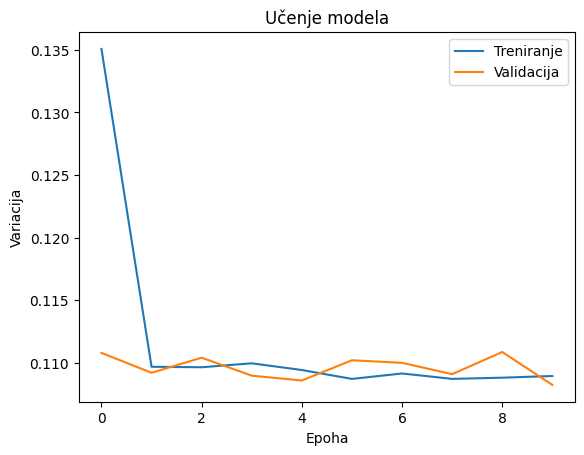

In [11]:
plt.plot(ucenje.history["mse"], label="Treniranje")
plt.plot(ucenje.history["val_mse"], label="Validacija")
plt.xlabel("Epoha")
plt.ylabel("Variacija")
plt.legend()
plt.title("Učenje modela")
plt.show()


Modra krivulja predstavlja napako pri učenju po vsakem prehodu skozi podatke (po vsaki epohi).
Vidimo, da napaka nekaj časa pada – v tem obdobju se model še uči – nato pa se ustali.

Oranžna črta predstavlja metriko na validacijskih podatkih.
Če vse poteka tako, kot je pričakovano, se oranžna črta po določenem času ujema z modro,
kar pomeni, da se je model naučil dobro posploševati (če smo uporabili enak model za metriko in stroškovno funkcijo).

Včasih pa opazimo, da je oranžna črta nad modro – temu pojavu pravimo »overfitting«.
To pomeni, da model dosega boljšo natančnost na podatkih, na katerih se je učil,
kot na podatkih, ki jih prvič vidi. Lahko bi rekli, da se je nevronska mreža
»napamet naučila« odgovorov, namesto da bi razumela pravilo.

Zato je pomembno, da natančnost modela vedno preverjamo na podatkih, ki jih model še ni videl (t. i. validacijski podatki).
Kako ravnati v primeru overfittinga, bomo spoznali kasneje.

### 1.5 Uporaba modela

Ko je model natreniran, ga lahko uporabimo za napoved novih vrednosti.
Najprej zgeneriramo deset novih vhodnih vrednosti, nato z ukazom
model.predict() iz novih vrednosti stolpcev A in B napovemo vrednosti stolpcev C in D.
Rezultate prikažemo v obliki tabele s pomočjo knjižnice pandas.

In [13]:
# Napoved na novih 10 primerih
A_new = np.random.rand(10)
B_new = np.random.rand(10)
C_new = A_new + B_new
D_new = A_new * B_new

X_new = np.vstack([A_new, B_new]).T
Y_new = np.vstack([C_new, D_new]).T

predictions = model.predict(X_new, verbose=0)

# Tabela rezultatov
results = pd.DataFrame({
    "A": A_new,
    "B": B_new,
    "C_pravi": Y_new[:, 0],
    "C_napoved": predictions[:, 0],
    "D_pravi": Y_new[:, 1],
    "D_napoved": predictions[:, 1],    
})

print("\n--- Tabela rezultatov ---")
print(results.round(3))


--- Tabela rezultatov ---
       A      B  C_pravi  C_napoved  D_pravi  D_napoved
0  0.400  0.194    0.593      0.989    0.077      0.253
1  0.998  0.892    1.890      0.990    0.891      0.208
2  0.584  0.271    0.854      0.975    0.158      0.238
3  0.537  0.944    1.481      0.935    0.507      0.218
4  0.898  0.160    1.058      0.975    0.144      0.237
5  0.416  0.106    0.522      0.984    0.044      0.253
6  0.904  0.190    1.093      0.977    0.171      0.237
7  0.696  0.469    1.165      0.978    0.326      0.235
8  0.149  0.391    0.540      0.966    0.058      0.234
9  0.081  0.923    1.004      0.948    0.075      0.224


Hitro opazimo, da se nevronska mreža ni najbolje izkazala.
V naslednjem koraku bomo torej poskusili model izboljšati.
Spodaj je navedenih nekaj pristopov in trikov.

### 1.6 Izboljšanje modela

ajvečja težava je v tem, da smo istočasno poskušali napovedati stolpca C in D,
pri tem pa uporabili enako meritev za napako.
Če želimo napovedovati oba stolpca hkrati, moramo normalizirati izhode.

Vrednosti stolpca C se namreč gibljejo med 0 in 2,
vrednosti stolpca D pa med 0 in 1.
Najbolje je, da oba stolpca preoblikujemo (normaliziramo) tako,
da za vsak stolpec posebej izračunamo povprečje in standardni odklon,
nato pa vrednosti preoblikujemo po enačbi:

$$C_{norm,i}=(C_{i}-C_{popv})/(C_{std}+10^{-12})$$

in podobno za stolpec D.

Majhno število $10^{-12}$
 dodamo zato, da preprečimo napako pri deljenju,
če bi bila standardna deviacija enaka nič.

Model nato učimo na normaliziranih vrednostih (C_norm in D_norm).
Dobljene napovedi bodo prav tako normalizirane, zato jih moramo po učenju pretvoriti nazaj po enačbi:
	​
$$C_{pravi,i}=C_{nap,i}*C_{std}+C_{povp}$$

enako velja tudi za stolpec D.

Še bolje pa je, če oba vrednosti obeh stolpcev napovedujemo ločeno. Keras sicer omogoča, da to uredimo znotraj ene mreže, a to presega ta učni modul. Tukaj bomo raje naredili dva modela, ločeno za napoved stolpca C in D. Najprej se lotimo stolpca C. Podatke že imamo generirane, samo pripravimo jih nekoliko drugače - izhod Y vsebuje le vrednosti stolpca C. 

In [14]:
X=np.vstack([A,B])
Y=C
X=X.T
Y=Y.T

Pri definiciji modela je pri izhodni plasti potrebno dimenzijo posatviti na 1, saj sedaj napovedujemo le en izhod:

In [15]:
model = keras.Sequential([
    layers.Dense(50, activation="relu", input_shape=(2,)),
    layers.Dense(50, activation="relu"),
    layers.Dense(1)  
])    

model.summary()

/home/anita/myenv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 50)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,751 (10.75 KB)

 Trainable params: 2,751 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

Pi pripravi modela, bomo opimizacijsko metodo definirali nekoliko drugače. Še vedno uporabljamo metodo Adam, vendar sedaj lahko nastavljamo korak učenja. Običajni korak je 0.001, ki ga po potrebi lahko zmanjšamo ali povečamo.

In [16]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="mse",
    metrics=["mse"]   
)

Ravno tako podatke ne bomo ročno delili na podatke za učenje in podatke za validacijo, temveč bomo naročili, da to opravi program. S parameter validation_split preprosto definiramo, kolikšen delež podatkov želimo pustiti ob strani za validacijo (0.2 pomeni, da 20% podatkov - torej eno petino - pustimo za validacijo). Prav tako se lahko "igramo" z nastavitvijo parametra batch_size in preizkusimo različne vrednosti.

In [17]:
ucenje = model.fit(
    X, Y,
    validation_split=0.2,
    epochs=50,
    batch_size=30,
    verbose=0
)

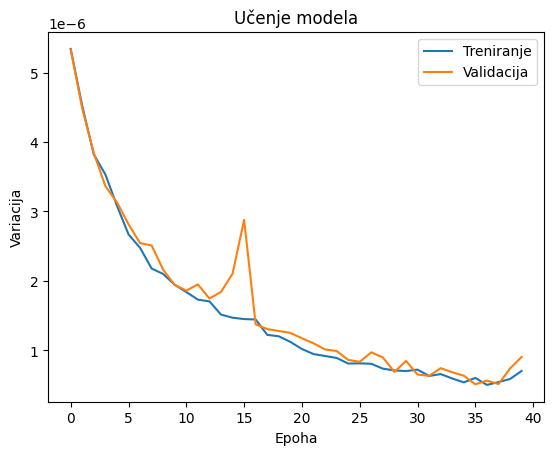


--- Tabela rezultatov ---
       A      B  C_pravi  C_napoved
0  0.654  0.640    1.294      1.294
1  0.963  0.420    1.383      1.381
2  0.921  0.897    1.818      1.818
3  0.956  0.889    1.845      1.845
4  0.697  0.064    0.760      0.760
5  0.754  0.365    1.119      1.118
6  0.962  0.370    1.331      1.330
7  0.204  0.912    1.116      1.115
8  0.150  0.982    1.132      1.130
9  0.755  0.438    1.193      1.193


In [18]:
# odrežemo nekaj prvih vrednosti, da lažje vidimo, kako hiro se model uči - zato uporabimo tistih [10:]
plt.plot(ucenje.history["mse"][10:], label="Treniranje")
plt.plot(ucenje.history["val_mse"][10:], label="Validacija")
plt.xlabel("Epoha")
plt.ylabel("Variacija")
plt.legend()
plt.title("Učenje modela")
plt.show()

#  Napoved na novih 10 primerih
A_new = np.random.rand(10)
B_new = np.random.rand(10)
C_new = A_new + B_new

X_new = np.vstack([A_new, B_new]).T
Y_new = C_new.T

predictions = model.predict(X_new, verbose=0)

# Tabela rezultatov
results = pd.DataFrame({
    "A": A_new,
    "B": B_new,
    "C_pravi": Y_new,
    "C_napoved": predictions[:, 0],   
})

print("\n--- Tabela rezultatov ---")
print(results.round(3))

Kot vidimo, model zdaj odlično napove prave rezultate – kar ni presenetljivo, saj gre za linearno odvisnost, ki bi jo moral model zelo dobro prepoznati in napovedovati.
Ker se modra krivulja še ni popolnoma izravnala, pomeni, da model še ni dosegel maksimalne natančnosti.

Poglejmo še napoved stolpca D.
Ker v tem primeru ne gre za linearno odvisnost, model ne doseže enake natančnosti,
vendar kljub temu dokaj dobro napove rezultat.

/home/anita/myenv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 50)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,751 (10.75 KB)

 Trainable params: 2,751 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

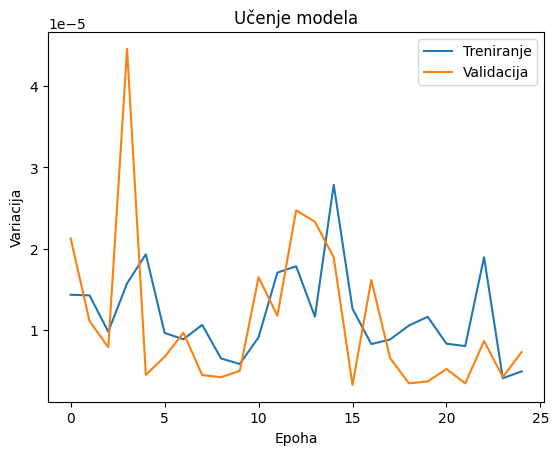


--- Tabela rezultatov ---
       A      B  D_pravi  D_napoved
0  0.246  0.157    0.038      0.040
1  0.903  0.999    0.901      0.897
2  0.204  0.024    0.005      0.007
3  0.821  0.037    0.030      0.028
4  0.108  0.466    0.050      0.054
5  0.220  0.572    0.126      0.129
6  0.335  0.038    0.013      0.011
7  0.761  0.547    0.417      0.419
8  0.833  0.352    0.293      0.295
9  0.089  0.564    0.050      0.054


In [20]:
X=np.vstack([A,B])
Y=D
X=X.T
Y=Y.T

model = keras.Sequential([
    layers.Dense(50, activation="relu", input_shape=(2,)),
    layers.Dense(50, activation="relu"),
    layers.Dense(1)  
])    

model.summary()

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="mse",
    metrics=["mse"]   # za pregled: mean absolute error
)

ucenje = model.fit(
    X, Y,
    validation_split=0.2,
    epochs=30,
    batch_size=10,
    verbose=0
)

# odrežemo nekaj prvih vrednosti, da lažje vidimo, kako hiro se model uči
plt.plot(ucenje.history["mse"][5:], label="Treniranje")
plt.plot(ucenje.history["val_mse"][5:], label="Validacija")
plt.xlabel("Epoha")
plt.ylabel("Variacija")
plt.legend()
plt.title("Učenje modela")
plt.show()

#  Napoved na novih 10 primerih
A_new = np.random.rand(10)
B_new = np.random.rand(10)
D_new = A_new * B_new

X_new = np.vstack([A_new, B_new]).T
Y_new = D_new.T

predictions = model.predict(X_new, verbose=0)

#  Tabela rezultatov
results = pd.DataFrame({
    "A": A_new,
    "B": B_new,
    "D_pravi": Y_new,
    "D_napoved": predictions[:, 0],   
})

print("\n--- Tabela rezultatov ---")
print(results.round(3))



V primeru »overfittinga« – ki ga sicer v zgornjih rezultatih ne opažamo – lahko uporabimo plast Dropout.
To ni plast v klasičnem pomenu besede, temveč mehanizem, ki modelu naroči, naj med učenjem naključno izpusti del podatkov (delež določi parameter).

Spodaj je prikazan primer uporabe plasti Dropout.
V našem primeru sicer ne izboljša rezultatov, saj overfitting ni prisoten,
vendar je uporaba takšne plasti zelo koristna pri modelih, ki se preveč prilagodijo učnim podatkom.

/home/anita/myenv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 50)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,751 (10.75 KB)

 Trainable params: 2,751 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

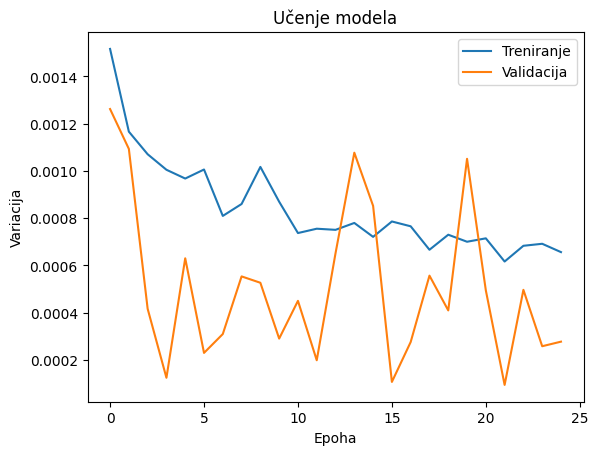


--- Tabela rezultatov ---
       A      B  D_pravi  D_napoved
0  0.772  0.668    0.515      0.492
1  0.446  0.021    0.010      0.018
2  0.515  0.422    0.217      0.210
3  0.640  0.371    0.238      0.223
4  0.170  0.213    0.036      0.050
5  0.994  0.001    0.001      0.019
6  0.754  0.119    0.090      0.089
7  0.464  0.008    0.004      0.013
8  0.032  0.585    0.019      0.033
9  0.740  0.538    0.398      0.379


In [24]:
X=np.vstack([A,B])
Y=D
X=X.T
Y=Y.T

model = keras.Sequential([
    layers.Dense(50, activation="relu", input_shape=(2,)),
    layers.Dropout(0.1),
    layers.Dense(50, activation="relu"),
    layers.Dropout(0.1),       
    layers.Dense(1)  
])    

model.summary()

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="mse",
    metrics=["mse"]   # za pregled: mean absolute error
)

ucenje = model.fit(
    X, Y,
    validation_split=0.2,
    epochs=30,
    batch_size=10,
    verbose=0
)


# odrežemo nekaj prvih vrednosti, da lažje vidimo, kako hiro se model uči
plt.plot(ucenje.history["mse"][5:], label="Treniranje")
plt.plot(ucenje.history["val_mse"][5:], label="Validacija")
plt.xlabel("Epoha")
plt.ylabel("Variacija")
plt.legend()
plt.title("Učenje modela")
plt.show()

#  Napoved na novih 10 primerih
A_new = np.random.rand(10)
B_new = np.random.rand(10)
D_new = A_new * B_new

X_new = np.vstack([A_new, B_new]).T
Y_new = D_new.T

predictions = model.predict(X_new, verbose=0)

# 7. Tabela rezultatov
results = pd.DataFrame({
    "A": A_new,
    "B": B_new,
    "D_pravi": Y_new,
    "D_napoved": predictions[:, 0],   
})

print("\n--- Tabela rezultatov ---")
print(results.round(3))